In [2]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('processed_data.csv',delimiter='\t',encoding='utf-8')

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])
dataset['Race']= label_encoder.fit_transform(dataset['Race'])
dataset['Medical_info']= label_encoder.fit_transform(dataset['Medical_info'])
dataset['views']= label_encoder.fit_transform(dataset['views'])


In [5]:
dataset.head(5)

,channelSubscriberCount,viewCount,likeCount,commentCount,channelViewCount,Medical_info,Gender,Race,Age,views
0,2480,377,5,5,1187453,1,0,1,33,1
1,9300,295857,2867,108,786277,1,0,3,29,0
2,53900,2823,14,0,16022717,0,0,6,36,1
3,2640,6944,103,2,211925,1,0,6,39,1
4,39900,15278,29,49,14735644,0,2,6,33,0


In [6]:
dataset.describe()

,channelSubscriberCount,viewCount,likeCount,commentCount,channelViewCount,Medical_info,Gender,Race,Age,views
count,3.100000e+02,3.100000e+02,310.000000,310.000000,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000
mean,9.755953e+05,1.906581e+05,2464.054839,141.632258,2.467388e+08,0.296774,0.803226,3.400000,22.983871,0.445161
std,3.668744e+06,5.519891e+05,8032.405508,484.751516,1.117136e+09,0.457575,0.806520,2.736781,15.860121,0.497787
min,0.000000e+00,1.500000e+01,0.000000,0.000000,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.447500e+03,3.042750e+03,15.250000,0.250000,1.188585e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.020000e+04,1.609450e+04,152.500000,9.000000,9.244567e+06,0.000000,1.000000,5.000000,31.000000,0.000000
75%,3.010000e+05,8.662825e+04,1402.750000,99.500000,5.820930e+07,1.000000,1.000000,6.000000,34.000000,1.000000
max,3.810000e+07,5.403915e+06,73171.000000,5209.000000,1.258721e+10,1.000000,2.000000,6.000000,47.000000,1.000000


In [7]:
print(dataset.corr()["views"].abs().sort_values(ascending=False))

views                     1.000000
viewCount                 0.303827
likeCount                 0.270354
commentCount              0.251537
Age                       0.159139
channelSubscriberCount    0.133362
channelViewCount          0.113775
Race                      0.044660
Gender                    0.030995
Medical_info              0.000642
Name: views, dtype: float64


<Axes: xlabel='views', ylabel='count'>

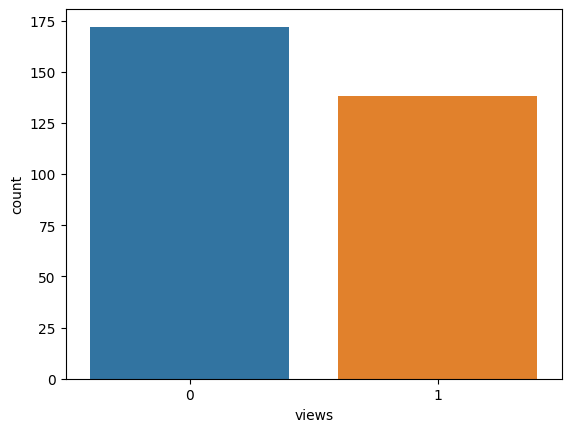

In [8]:
y = dataset["views"]

sns.countplot(x=y)

<Axes: xlabel='Gender', ylabel='count'>

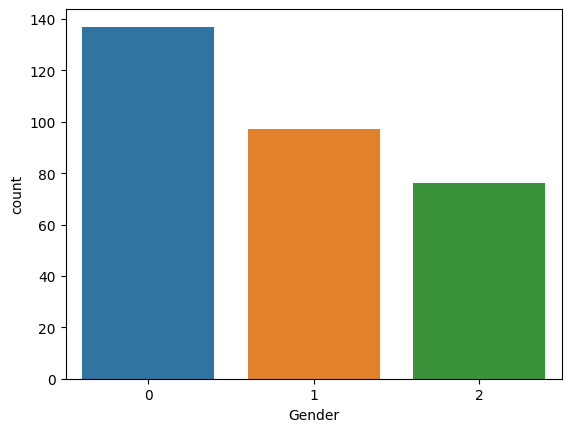

In [10]:
# y = dataset["views"]

sns.countplot(x=dataset["Gender"])

Gender ['Man', 'No Actor', 'Female'] 0
Medical_info ['high', 'low'] 1
Race ['asian', 'indian', 'white', 'No Actor', 'middle eastern', 'black', 'latino hispanic'] 2


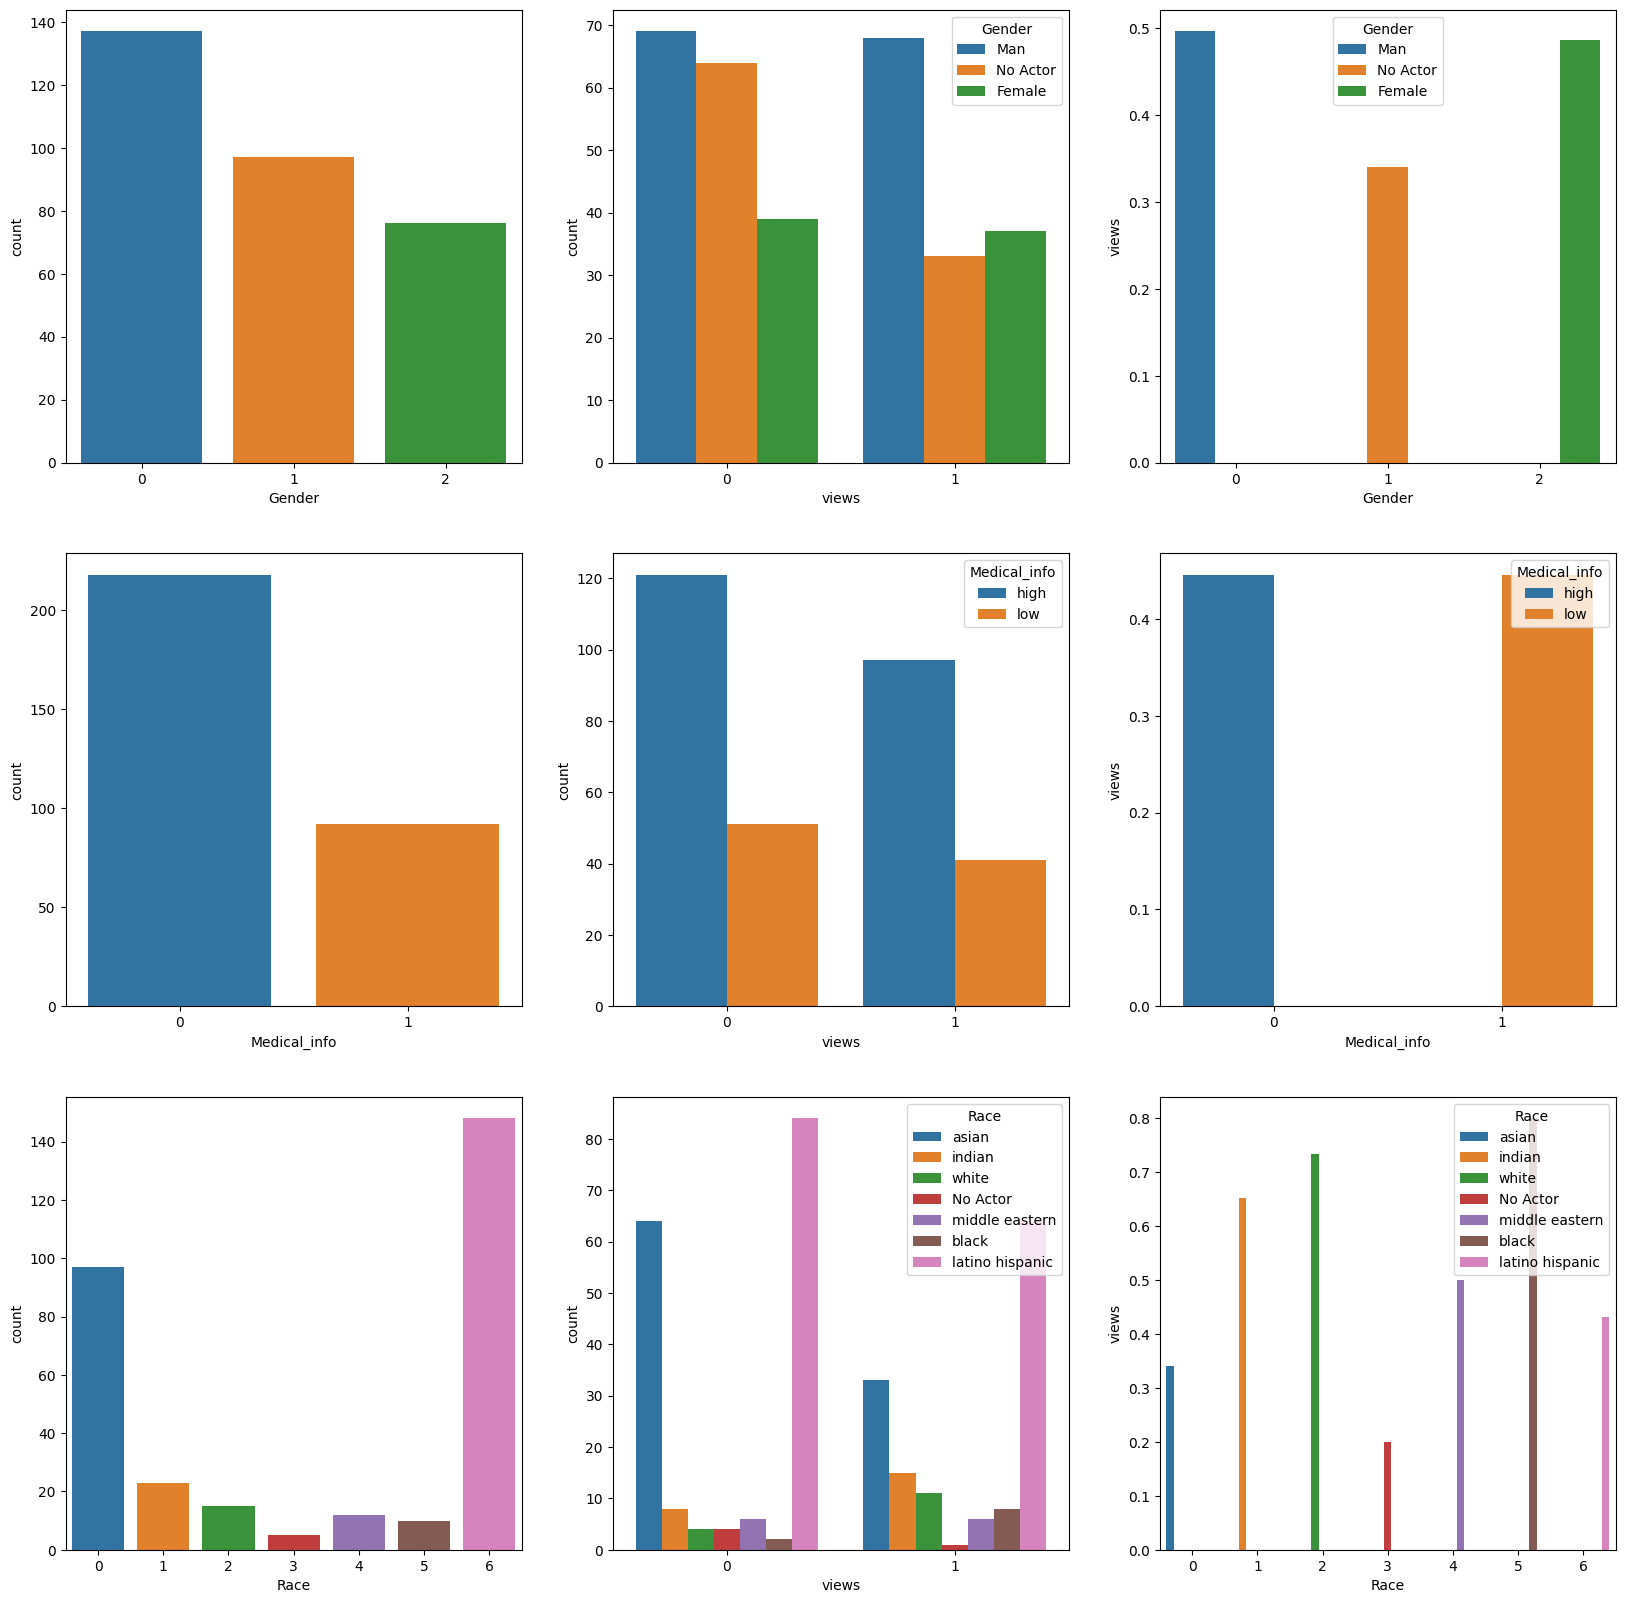

In [11]:
categorial = [('Gender', ['Man', 'No Actor','Female']), 
              ('Medical_info', ['high', 'low']),
              ('Race',['asian', 'indian', 'white', 'No Actor', 'middle eastern', 'black',
       'latino hispanic'])
]

def plotGrid(isCategorial):
    if isCategorial:
        for i, x in enumerate(categorial):
            print(x[0], x[1], i)

        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]
        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=dataset, ax=axes[ax_index][0])
    sns.countplot(x='views', hue=attribute, data=dataset, ax=axes[ax_index][1])
    avg = dataset[[attribute, 'views']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='views', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)
        
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(20, 20))

plotGrid(isCategorial=True)

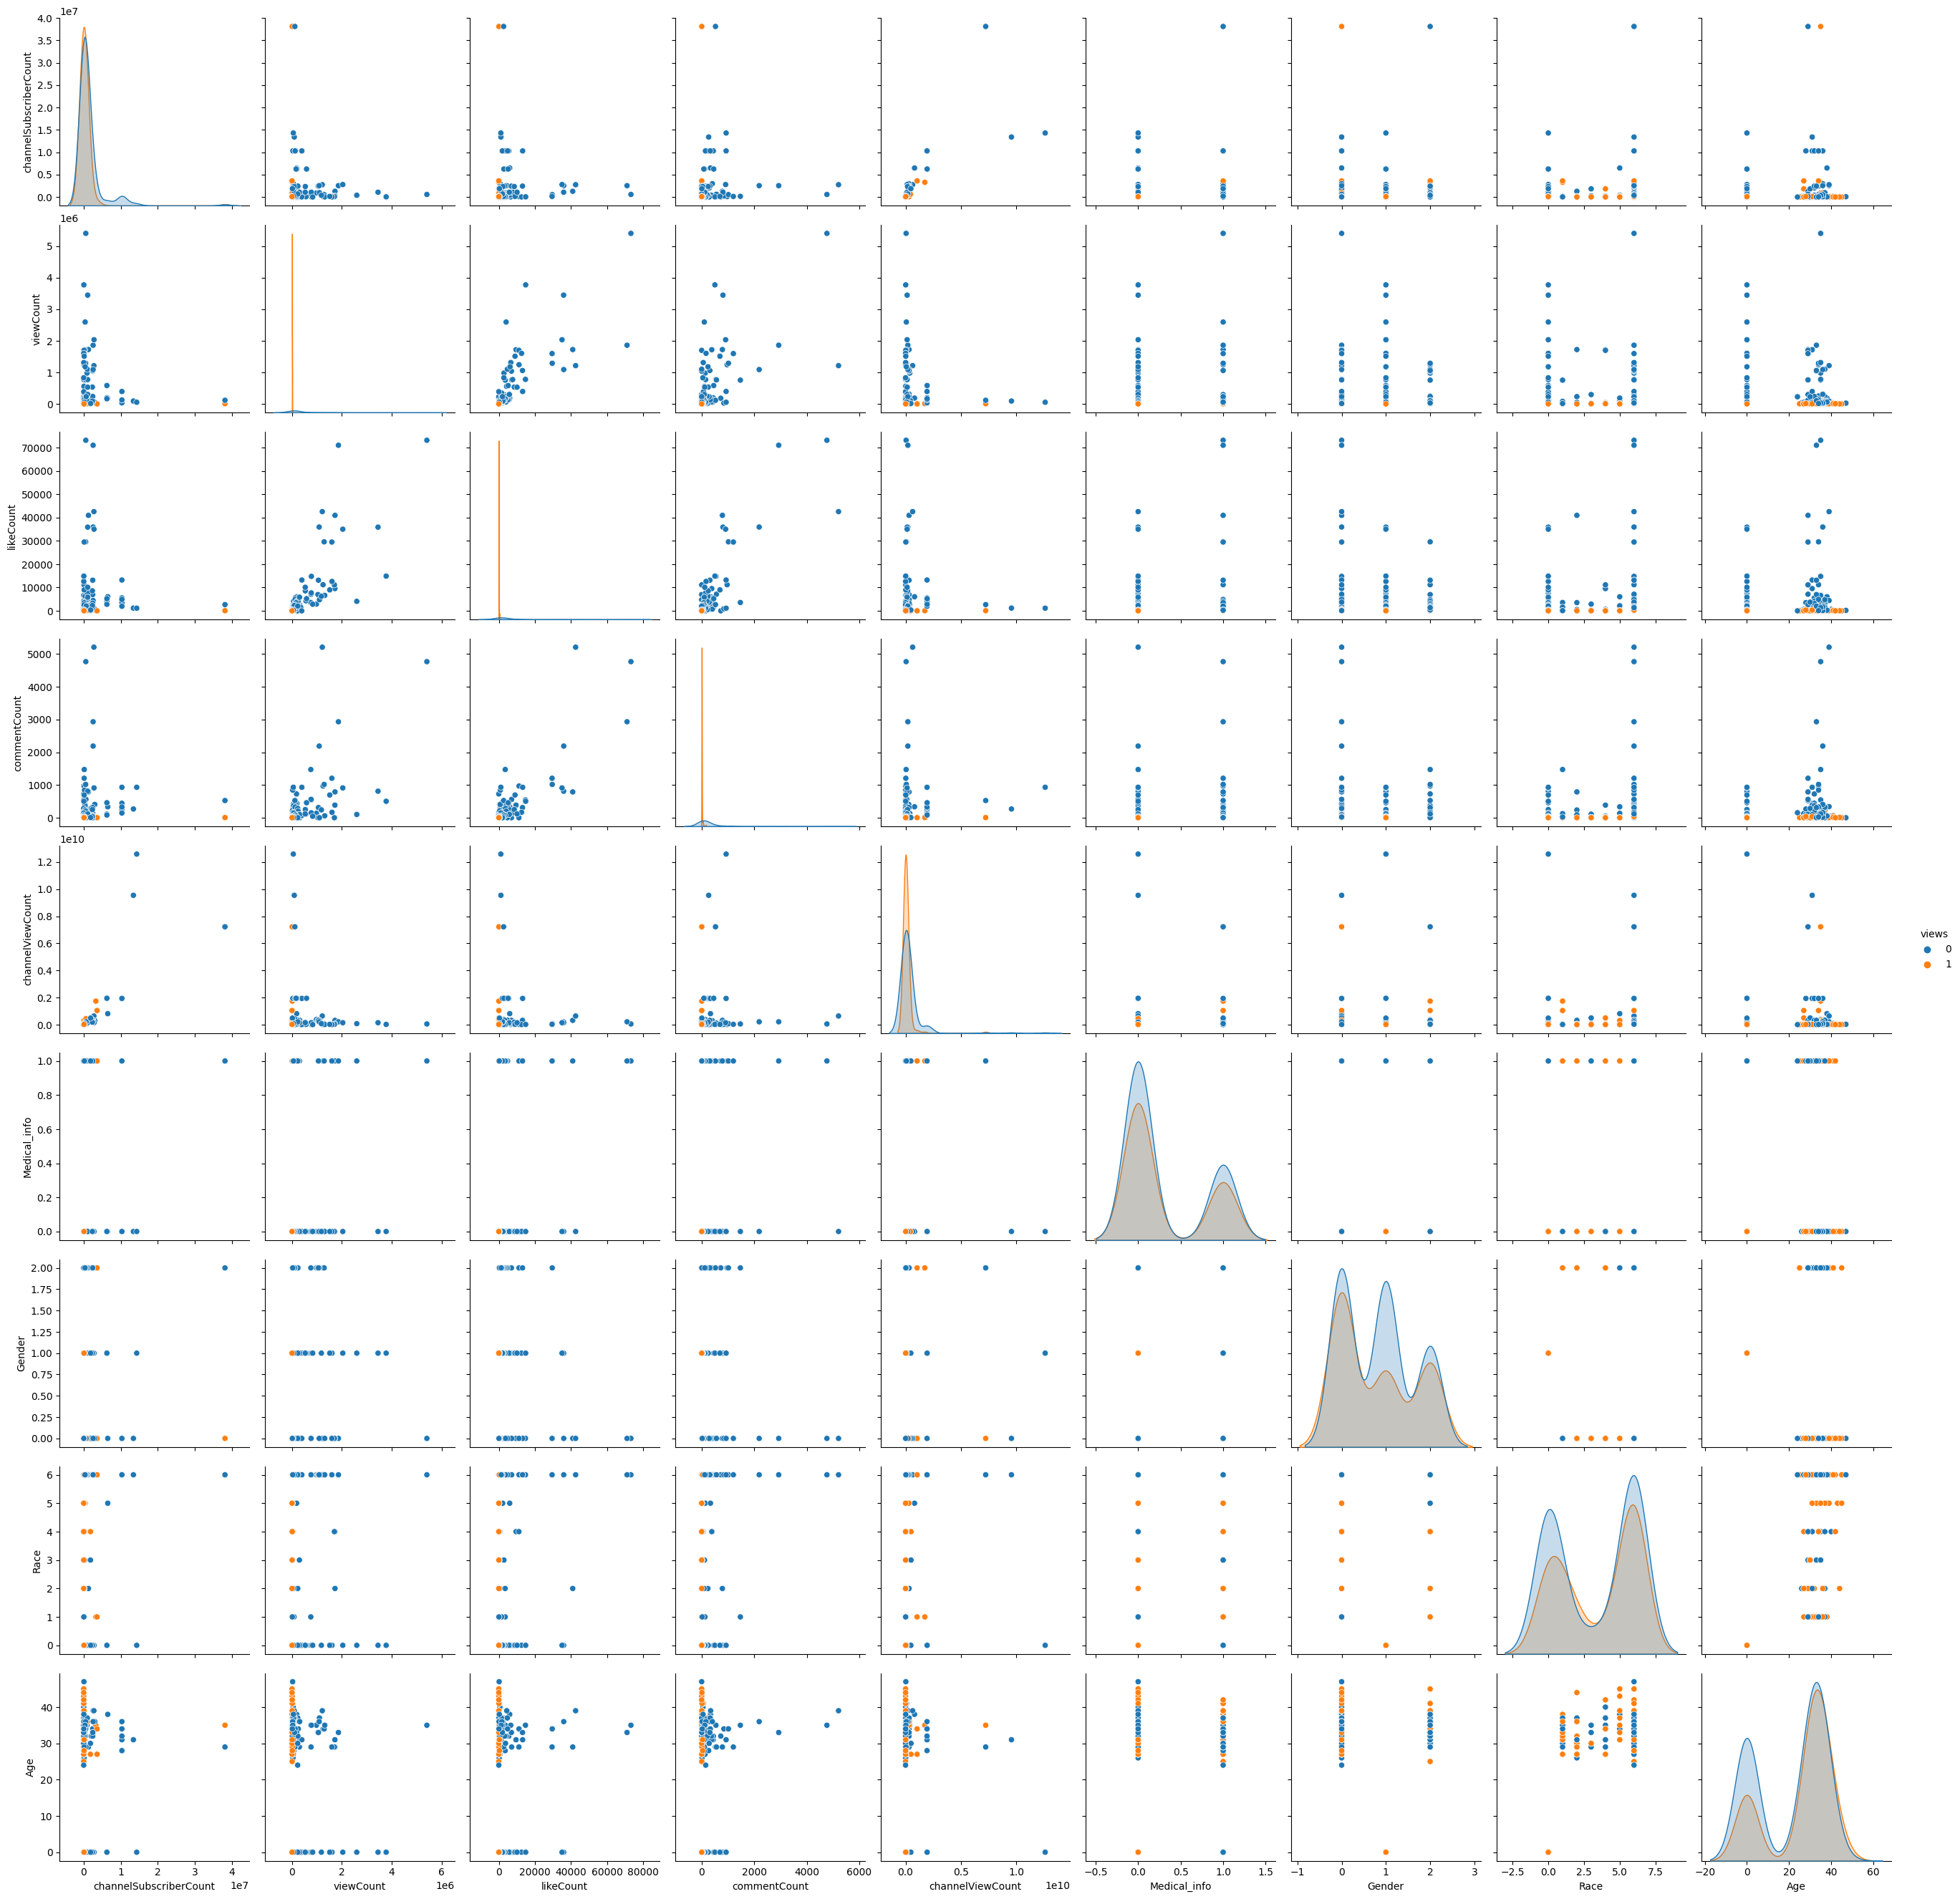

In [12]:
sns.pairplot(dataset,hue="views",size=3)


In [13]:
del dataset['viewCount']

In [14]:

from sklearn.model_selection import train_test_split
X = dataset.drop('views', axis=1)
y = dataset['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [15]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_norm, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

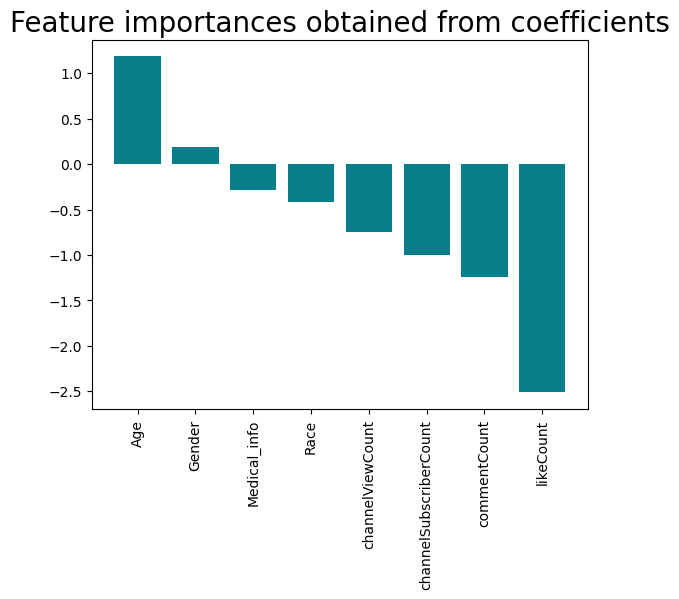

In [18]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


In [19]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_norm, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

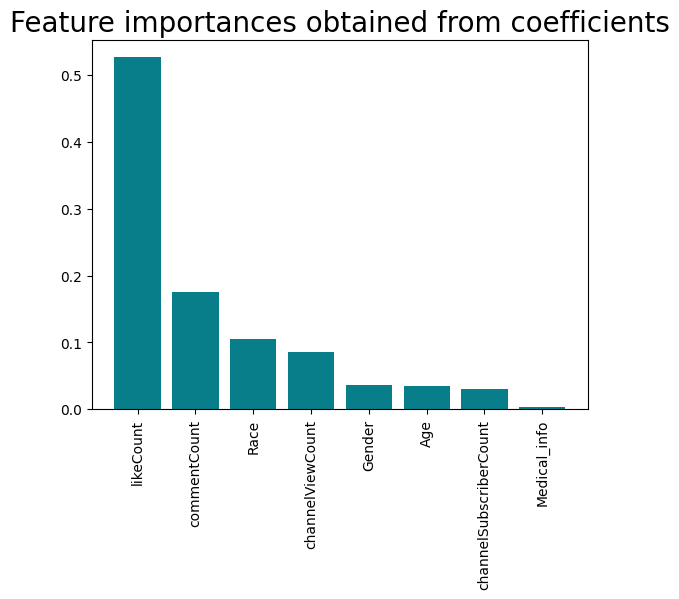

In [20]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()